In [227]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import altair as alt
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go 

In [229]:
ecommerce = pd.read_csv('ecommerce_customer_churn_dataset.csv')
ecommerce.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


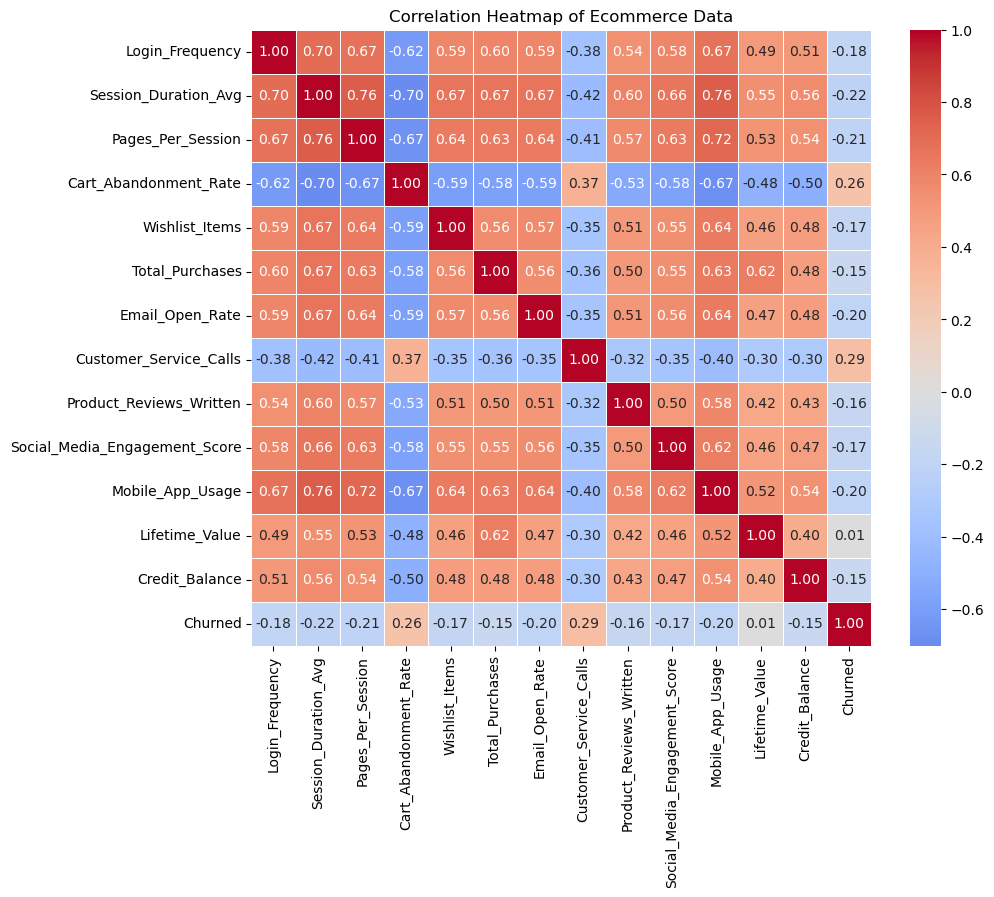

In [231]:
col = ['Login_Frequency',
       'Session_Duration_Avg',
       'Pages_Per_Session',
       'Cart_Abandonment_Rate',
       'Wishlist_Items',
       'Total_Purchases',
       'Email_Open_Rate',
       'Customer_Service_Calls',
       'Product_Reviews_Written',
       'Social_Media_Engagement_Score',
       'Mobile_App_Usage',
       'Lifetime_Value',
       'Credit_Balance',
       'Churned']

new_ecommerce = ecommerce[col].dropna() 
new_ecommerce.shape

plt.figure(figsize = (10,8)) 
sns.heatmap(new_ecommerce.corr(), 
            annot = True, 
            fmt = ".2f",
            cmap = 'coolwarm', 
            center = 0, 
            linewidth=0.5) 
plt.title('Correlation Heatmap of Ecommerce Data') 
plt.show()


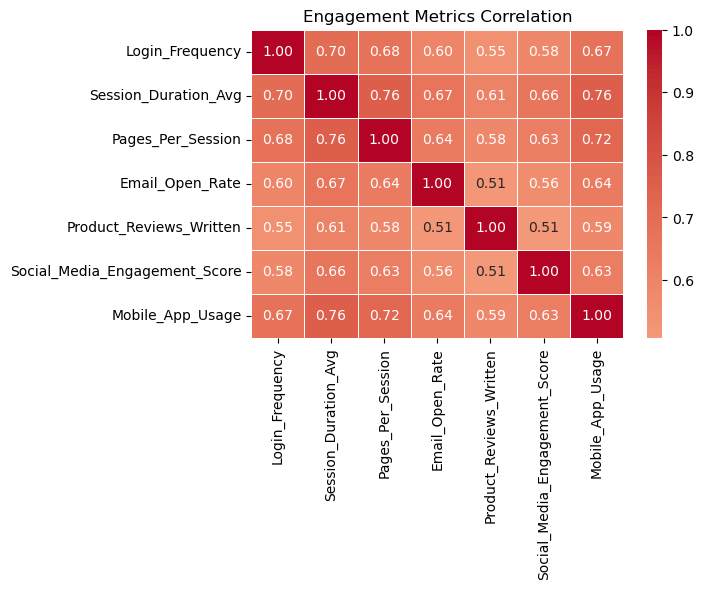

In [233]:
col_engagement = ['Login_Frequency',
                  'Session_Duration_Avg',
                  'Pages_Per_Session',
                  'Email_Open_Rate',
                  'Product_Reviews_Written',
                  'Social_Media_Engagement_Score',
                  'Mobile_App_Usage']

engagement_metrics = ecommerce[col_engagement]

plt.figure(figsize = (6,4)) 
sns.heatmap(engagement_metrics.corr(),
            annot = True, 
            fmt = ".2f",
            cmap = 'coolwarm',
            center = 0, 
            linewidth = 0.5)
plt.title('Engagement Metrics Correlation') 
plt.show()

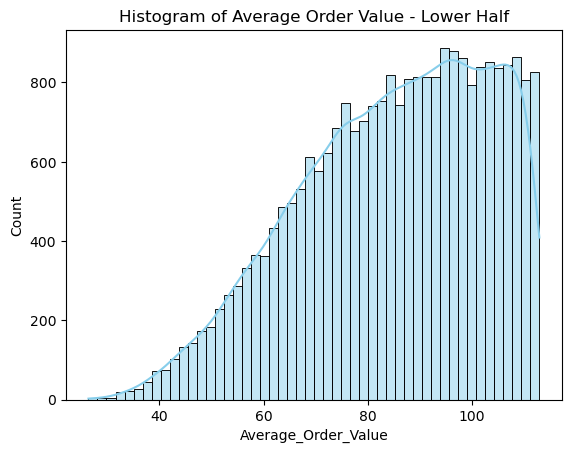

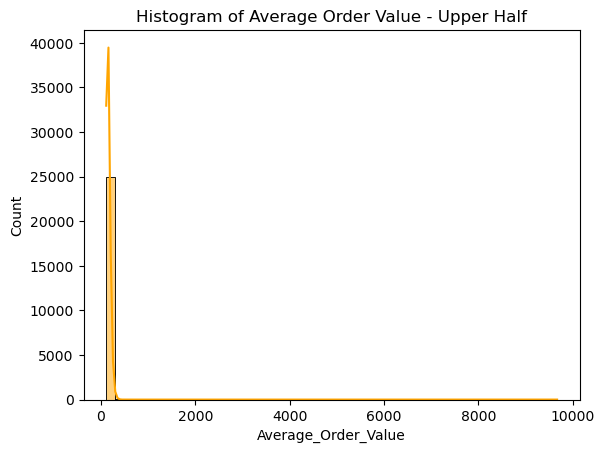

In [235]:
#????

# Drop NA
aov = ecommerce['Average_Order_Value'].dropna()

# Split into two halves by median
median = np.median(aov)
lower_half = aov[aov <= median]
upper_half = aov[aov > median]

# Plot lower half
sns.histplot(lower_half, bins=50, color='skyblue', kde=True)
plt.title('Histogram of Average Order Value - Lower Half')
plt.show()

# Plot upper half
sns.histplot(upper_half, bins=50, color='orange', kde=True)
plt.title('Histogram of Average Order Value - Upper Half')
plt.show()

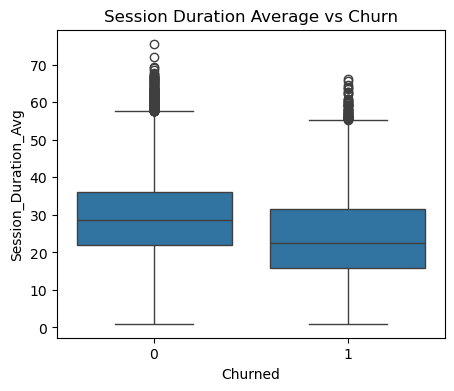

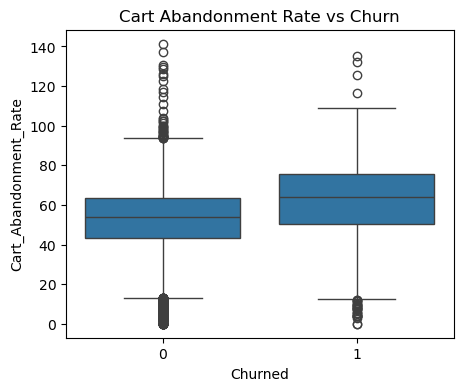

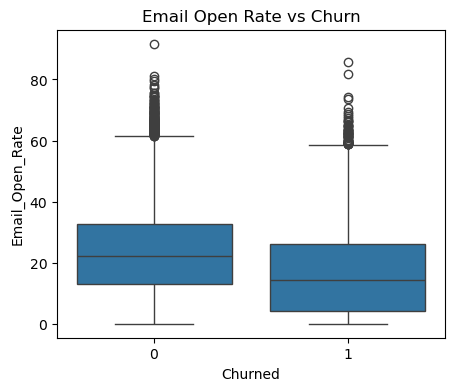

In [237]:
boxplot_col = ['Churned', 'Session_Duration_Avg', 'Cart_Abandonment_Rate', 'Email_Open_Rate']
ecommerce_boxplots = ecommerce[boxplot_col].dropna()


# Make sure Churn is categorical
ecommerce_boxplots['Churned'] = ecommerce_boxplots['Churned'].astype(str)

# 1️⃣ Session Duration vs Churn
plt.figure(figsize=(5,4))
sns.boxplot(x='Churned', y='Session_Duration_Avg', data=ecommerce_boxplots)
plt.title('Session Duration Average vs Churn')
plt.show()

# 2️⃣ Cart Abandonment Rate vs Churn
plt.figure(figsize=(5,4))
sns.boxplot(x='Churned', y='Cart_Abandonment_Rate', data=ecommerce_boxplots)
plt.title('Cart Abandonment Rate vs Churn')
plt.show()

# 3️⃣ Email Open Rate vs Churn
plt.figure(figsize=(5,4))
sns.boxplot(x='Churned', y='Email_Open_Rate', data=ecommerce_boxplots)
plt.title('Email Open Rate vs Churn')
plt.show()

In [239]:

dropdown = alt.binding_select(options = ['Session_Duration_Avg', 'Cart_Abandonment_Rate', 'Email_Open_Rate'],
                              labels = ['Session Duration Avg', 'Cart Abandonment Rate', 'Email Open Rate'],
                              name = 'Variable')

selection = alt.selection_point(bind = dropdown) 

In [241]:
engagement_features = [
    'Login_Frequency',
    'Session_Duration_Avg',
    'Pages_Per_Session',
    'Email_Open_Rate'
]

scaler = StandardScaler()
ecommerce_scaled = ecommerce.copy()

ecommerce_scaled[engagement_features] = scaler.fit_transform(
    ecommerce[engagement_features]
)

ecommerce_scaled['Engagement_Score'] = (
    ecommerce_scaled[engagement_features].mean(axis=1)
)

ecommerce_scaled['Engagement_Level'] = pd.qcut(
    ecommerce_scaled['Engagement_Score'],
    q=3,
    labels=['Low Engagement', 'Medium Engagement', 'High Engagement']
)

ecommerce_scaled[['Signup_Quarter', 'Engagement_Level', 'Churned']].head()

,Signup_Quarter,Engagement_Level,Churned
0,Q1,Medium Engagement,0
1,Q4,High Engagement,0
2,Q4,Low Engagement,0
3,Q1,High Engagement,0
4,Q4,High Engagement,0


In [243]:
df = ecommerce_scaled.copy()

# Map churn to readable labels
df['Churned'] = df['Churned'].map({0: 'Not Churned', 1: 'Churned'})

flow_1 = (
    df.groupby(['Signup_Quarter', 'Engagement_Level'])
      .size()
      .reset_index(name='value')
)
flow_1.columns = ['source', 'target', 'value']

flow_2 = (
    df.groupby(['Engagement_Level', 'Churned'])
      .size()
      .reset_index(name='value')
)
flow_2.columns = ['source', 'target', 'value']

links_df = pd.concat([flow_1, flow_2], ignore_index=True)

nodes = pd.unique(links_df[['source', 'target']].values.ravel())
node_map = {name: i for i, name in enumerate(nodes)}

links_df['source_id'] = links_df['source'].map(node_map)
links_df['target_id'] = links_df['target'].map(node_map)

/var/folders/qb/f05byqr176l_hzwdqrtq2svm0000gn/T/ipykernel_8386/3298975718.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/qb/f05byqr176l_hzwdqrtq2svm0000gn/T/ipykernel_8386/3298975718.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



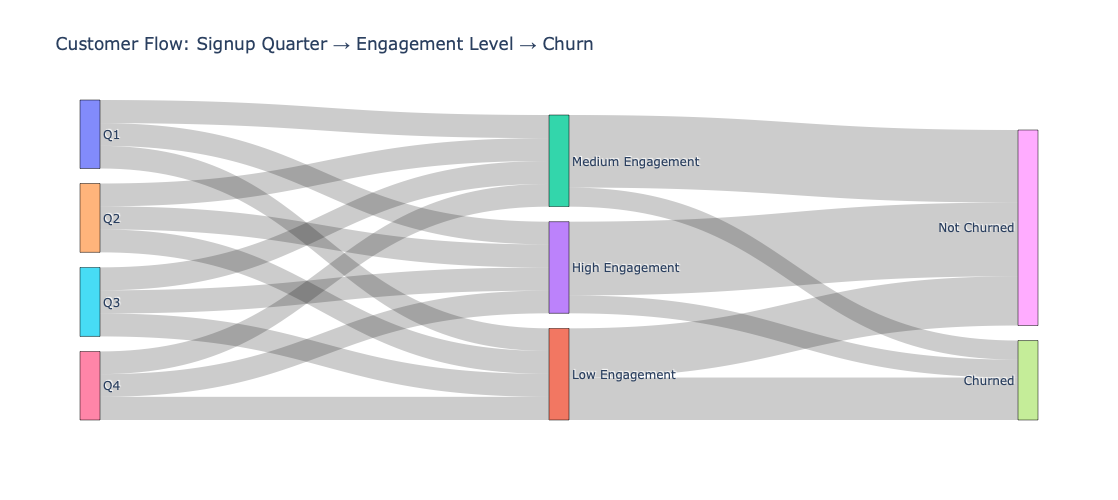

In [245]:
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=list(nodes)
    ),
    link=dict(
        source=links_df['source_id'],
        target=links_df['target_id'],
        value=links_df['value']
    )
))

fig.update_layout(
    title_text='Customer Flow: Signup Quarter → Engagement Level → Churn',
    font_size=12,
    width=900,
    height=500
)

fig.show()
